**Brian Blaylock**  
**April 3, 2019**

# Explore Contingency Table and Fractions Skill Score
## Violin: All hours in a month

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
from matplotlib.path import Path

import matplotlib as mpl
#mpl.rcParams['figure.figsize'] = [15,15]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.15
mpl.rcParams['figure.subplot.hspace'] = 0.15
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100

SAVEDIR = '/uufs/chpc.utah.edu/common/home/u0553130/public_html/PhD/HRRR_GOES/GLM_hit_rate/'
if not os.path.exists(SAVEDIR):
    os.makedirs(SAVEDIR)

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
from BB_maps.my_basemap import draw_HRRR_map, draw_centermap
from BB_HRRR.HRRR_Pando import get_hrrr_latlon, get_hrrr_variable
from BB_HRRR.GLM_and_HRRR.GLM_events_HRRR import get_GLM_HRRR_contingency_stats,\
                                                 hit_rate, \
                                                 false_alarm_ratio
from BB_HRRR.HRRR_paths import get_domains
from BB_GOES.get_GLM import get_GLM_file_nearesttime, accumulate_GLM_FAST

In [4]:
domains = get_domains()

In [5]:
## Specify the valid Datetime of interest
#DATE = datetime(2018, 5, 14, 22) # Mallard Fire
#DATE = datetime(2018, 7, 5, 23)  # Lake Christine 1
DATE = datetime(2018, 7, 6, 0)    # Lake Christine 2
#DATE = datetime(2018, 7, 17, 6)  # July Storm
#DATE = datetime(2018, 7, 27, 0)  # Missing GLM data

#DATE = datetime(2018, 7, 6, 0) # Test July 1, 2019

# Single Datetime: Hit Rate/ False Alarm Ratio

In [106]:
def get_contingency_table_by_hour(HOUR, MONTHS=range(5,11)):
    """
    Return a dictionary of all the data for the specified Hour from each month.
    
    Input:
        HOUR   - The hour of day, 0-23.
        MONTHS - Default is May-Oct, becuase that is what is avaialble right now.
    """
    data_dict = {}
    for DOMAIN in domains:
        data_dict[DOMAIN] = {}
        for MONTH in MONTHS:
            DIR = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_HRRR/GLM_and_HRRR/HRRR_GLM_contingency_table'
            FILE = '/%s/%s_2018_m%02d_h%02d.csv' % (DOMAIN, DOMAIN, MONTH, HOUR)
            data_dict[DOMAIN][MONTH] = np.genfromtxt(DIR+FILE, delimiter=',', names=True, dtype=None, encoding='UTF-8')    
    return data_dict

def get_FSS_by_hour(HOUR, radius, MONTHS=range(5,11)):
    """
    Return a dictionary of all the data for the specified Hour from each month.
    
    Input:
        HOUR   - The hour of day, 0-23.
        MONTHS - Default is May-Oct, becuase that is what is avaialble right now.
    """
    data_dict = {}
    for DOMAIN in domains:
        data_dict[DOMAIN] = {}
        for MONTH in MONTHS:
            DIR = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_HRRR/GLM_and_HRRR/HRRR_GLM_Fractions_Skill_Score_r%02d/' % radius
            FILE = '%s/%s_2018_m%02d_h%02d.csv' % (DOMAIN, DOMAIN, MONTH, HOUR)
            data_dict[DOMAIN][MONTH] = np.genfromtxt(DIR+FILE, delimiter=',', names=True, dtype=None, encoding='UTF-8')    
    return data_dict

In [116]:
radii = [5, 10, 20]
data_dict_FSS = [get_FSS_by_hour(HOUR=0, radius=r) for r in radii]

In [126]:
FSS_r05 = np.array([data_dict_FSS[0][DOMAIN][MONTH]['F%02d_FSS' % s] for s in range(1,19)])
FSS_r10 = np.array([data_dict_FSS[1][DOMAIN][MONTH]['F%02d_FSS' % s] for s in range(1,19)])
FSS_r20 = np.array([data_dict_FSS[2][DOMAIN][MONTH]['F%02d_FSS' % s] for s in range(1,19)])

In [140]:
np.shape(np.mean(FSS_r05, axis=1))

(18,)

/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:152: RuntimeWarning: invalid value encountered in true_divide
  FAR = b/(a+b)
/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_wx_calcs/binary_events.py:125: RuntimeWarning: invalid value encountered in true_divide
  H = a/(a+c)


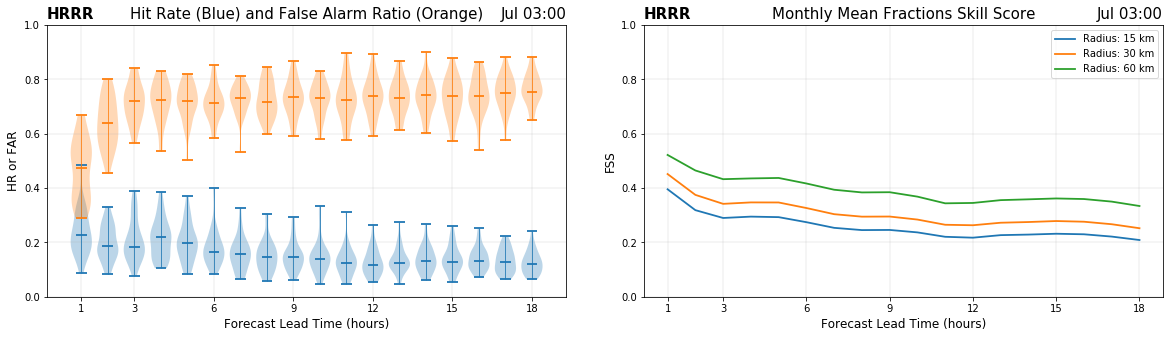

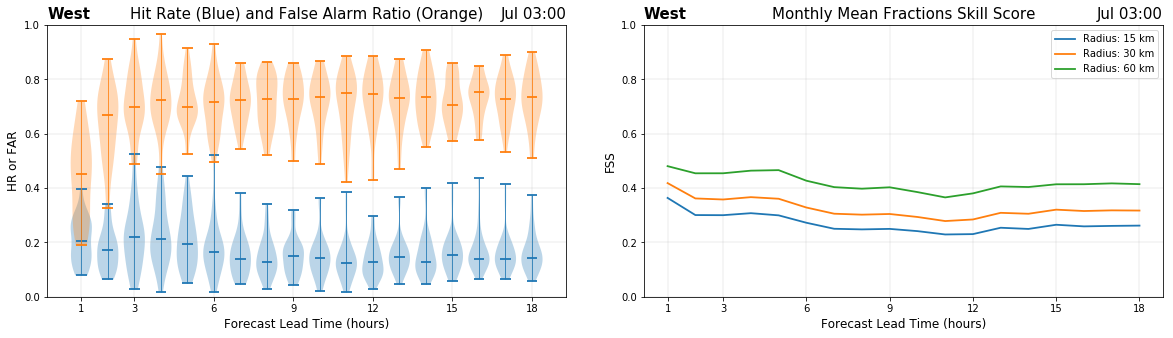

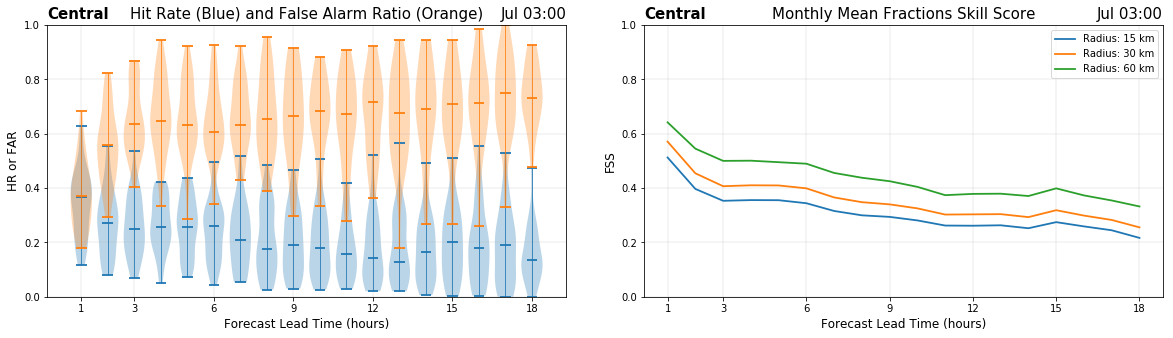

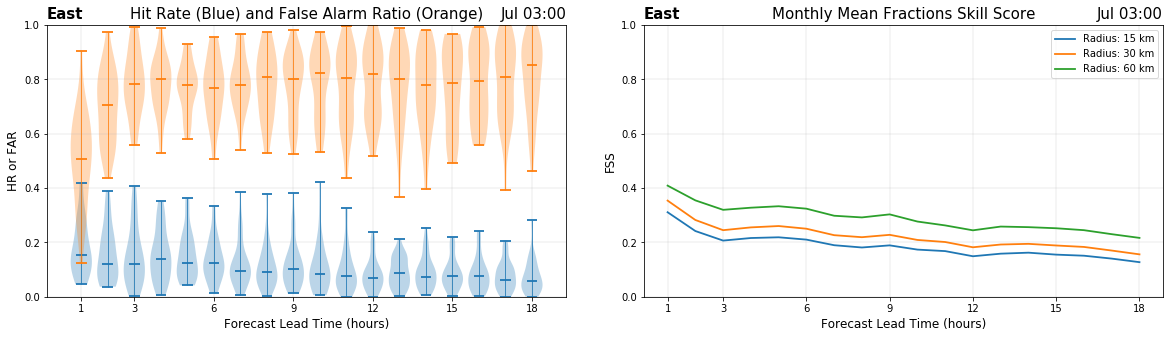

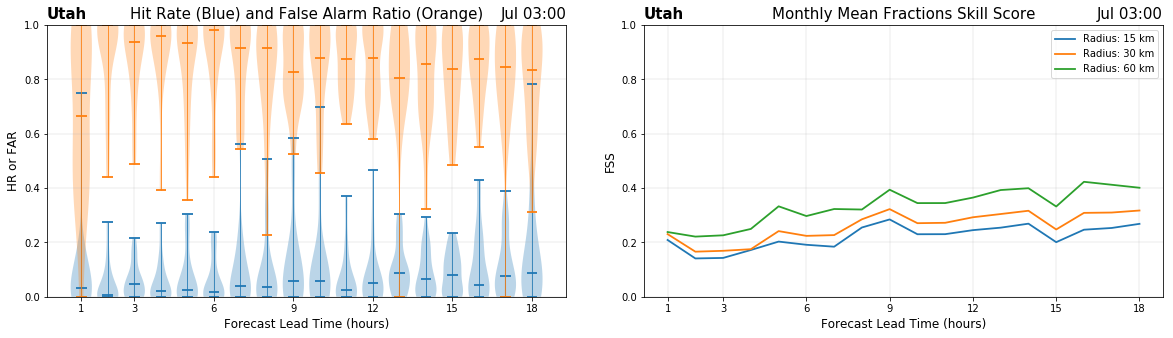

In [149]:
HOUR = 3

radii = [5, 10, 20]
MONTHS = range(5,11)

data_dict = get_contingency_table_by_hour(HOUR)
data_dict_FSS = [get_FSS_by_hour(HOUR, radius=r) for r in radii]

for DOMAIN in domains:

    for MONTH in MONTHS:

        A = np.array([data_dict[DOMAIN][MONTH]['F%02d_A' % s] for s in range(1,19)])
        B = np.array([data_dict[DOMAIN][MONTH]['F%02d_B' % s] for s in range(1,19)])
        C = np.array([data_dict[DOMAIN][MONTH]['F%02d_C' % s] for s in range(1,19)])
        D = np.array([data_dict[DOMAIN][MONTH]['F%02d_D' % s] for s in range(1,19)])
        FSS_r05 = np.array([data_dict_FSS[0][DOMAIN][MONTH]['F%02d_FSS' % s] for s in range(1,19)])
        FSS_r10 = np.array([data_dict_FSS[1][DOMAIN][MONTH]['F%02d_FSS' % s] for s in range(1,19)])
        FSS_r20 = np.array([data_dict_FSS[2][DOMAIN][MONTH]['F%02d_FSS' % s] for s in range(1,19)])

        HR = hit_rate(A, B, C, D)
        FAR = false_alarm_ratio(A, B, C, D)

        HR = np.array([i[~np.isnan(i)] for i in HR])
        FAR = np.array([i[~np.isnan(i)] for i in FAR])
        FSS_r05 = np.array([i[~np.isnan(i)] for i in FSS_r05])
        FSS_r10 = np.array([i[~np.isnan(i)] for i in FSS_r10])
        FSS_r20 = np.array([i[~np.isnan(i)] for i in FSS_r20])

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

        plt.sca(ax1)
        v1 = plt.violinplot(np.transpose(HR), showmedians=True, widths=.8);
        v2 = plt.violinplot(np.transpose(FAR), showmedians=True, widths=.8);
        v1['cbars'].set_linewidth(.8);
        v2['cbars'].set_linewidth(.8);

        plt.title(DOMAIN, loc='left', fontweight='semibold')
        plt.title('Hit Rate (Blue) and False Alarm Ratio (Orange)')
        plt.title('%s %02d:00' % (datetime(2018, MONTH, 1).strftime('%b'), HOUR), loc='right')
        plt.grid()
        plt.xlabel('Forecast Lead Time (hours)')
        plt.ylabel('HR or FAR')
        plt.ylim([0,1])
        plt.xticks([1,3,6,9,12,15,18], [1,3,6,9,12,15,18]);

        plt.sca(ax2)
    #    v1 = plt.violinplot(np.transpose(FSS_r05), showmedians=True, widths=.8);
    #    v2 = plt.violinplot(np.transpose(FSS_r10), showmedians=True, widths=.8);
    #    v3 = plt.violinplot(np.transpose(FSS_r20), showmedians=True, widths=.8);
    #    v1['cbars'].set_linewidth(.8);
    #    v2['cbars'].set_linewidth(.8);
    #    v3['cbars'].set_linewidth(.8);
        plt.plot(range(1,19), np.mean(FSS_r05, axis=1), label='Radius: 15 km')
        plt.plot(range(1,19), np.mean(FSS_r10, axis=1), label='Radius: 30 km')
        plt.plot(range(1,19), np.mean(FSS_r20, axis=1), label='Radius: 60 km')

        plt.legend()
        plt.title(DOMAIN, loc='left', fontweight='semibold')
        plt.title('Monthly Mean Fractions Skill Score')
        plt.title('%s %02d:00' % (datetime(2018, MONTH, 1).strftime('%b'), HOUR), loc='right')
        plt.grid()
        plt.xlabel('Forecast Lead Time (hours)')
        plt.ylabel('FSS')
        plt.ylim([0,1])
        plt.xticks([1,3,6,9,12,15,18], [1,3,6,9,12,15,18]);

        SAVEDIR = '/uufs/chpc.utah.edu/common/home/u0553130/public_html/PhD/GLM_and_HRRR/stats_by_month_hour/'
        if not os.path.exists(SAVEDIR):
                os.makedirs(SAVEDIR)
        plt.savefig(SAVEDIR+'m%02d_h%02d_%s' % (MONTH, HOUR, DOMAIN))

        # Only keep plots for July open
        if MONTH != 7:
            plt.close()
## Show the spread by day of month

#plt.figure(figsize=(10,5))
#v = plt.violinplot(HR, showmedians=True, widths=.8);
#v['cbars'].set_linewidth(.8);

#plt.figure(figsize=(10,5))
#v = plt.violinplot(FAR, showmedians=True, widths=.8);
#v['cbars'].set_linewidth(.8);


(18, 31)

In [73]:
def get_GLM_HRRR_stats_day(DATE, DOMAIN, verbose=True):
    DIR = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_HRRR/GLM_and_HRRR/HRRR_GLM_contingency_table'
    FILE = '/%s/%s_2018_m%02d_h%02d.csv' % (DOMAIN, DOMAIN, DATE.month, DATE.hour)

    data = np.genfromtxt(DIR+FILE, delimiter=',', names=True, dtype=None, encoding='UTF-8')
    # NOTE: Set encoding to 'UTF-8' so the date doesn't return as bytes

    if verbose:
        print(data.dtype.names)
    
    # Get the data from the line that cooresponds to the date requested
    line = data[DATE.day-1]

    # Double check that the line we got is the date requested
    if datetime.strptime(line[0], '%Y-%m-%d %H:%M:%S') != DATE:
        print('WARNING: Date of this line does not match the requested DATE')
        print('Grabbed date ', line[0])
    
    if verbose:
        #number of flashes
        num_flashes = int(line[1])
        print('Got {:,} events in {:} domain ({:} of {:} files).'.format(num_flashes, DOMAIN, line[2], line[3]))
    
    return line

def get_GLM_HRRR_FSS_day(DATE, DOMAIN, radius, verbose=True):
    DIR = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_HRRR/GLM_and_HRRR/HRRR_GLM_Fractions_Skill_Score_r%02d/' % radius
    FILE = '%s/%s_2018_m%02d_h%02d.csv' % (DOMAIN, DOMAIN, DATE.month, DATE.hour)

    data = np.genfromtxt(DIR+FILE, delimiter=',', names=True, dtype=None, encoding='UTF-8')
    # NOTE: Set encoding to 'UTF-8' so the date doesn't return as bytes

    if verbose:
        print(data.dtype.names)
    
    # Get the data from the line that cooresponds to the date requested
    line = data[DATE.day-1]

    # Double check that the line we got is the date requested
    if datetime.strptime(line[0], '%Y-%m-%d %H:%M:%S') != DATE:
        print('WARNING: Date of this line does not match the requested DATE')
        print('Grabbed date ', line[0])
    
    if verbose:
        #number of flashes
        num_flashes = int(line[1])
        print('Got {:,} events in {:} domain ({:} of {:} files).'.format(num_flashes, DOMAIN, line[2], line[3]))
    
    return line

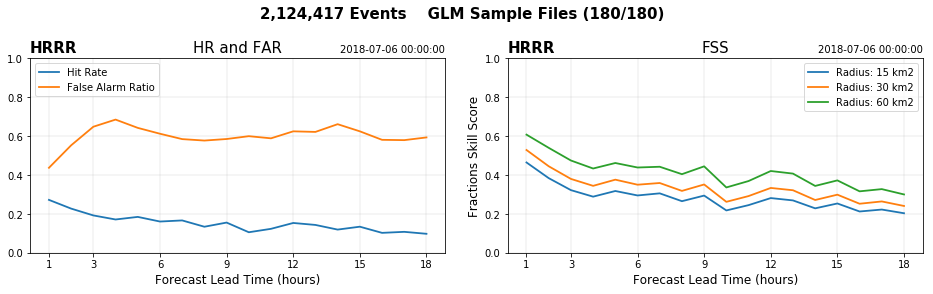

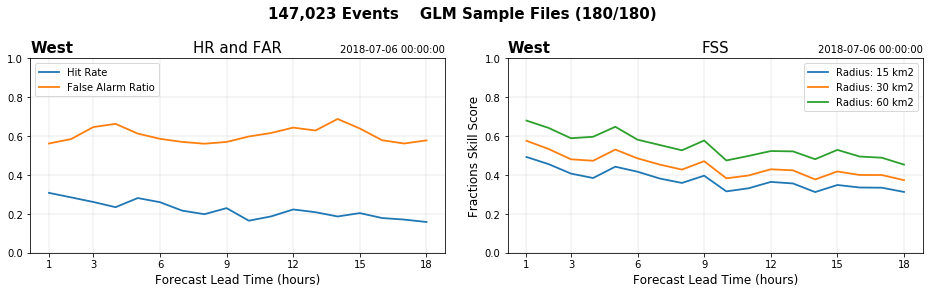

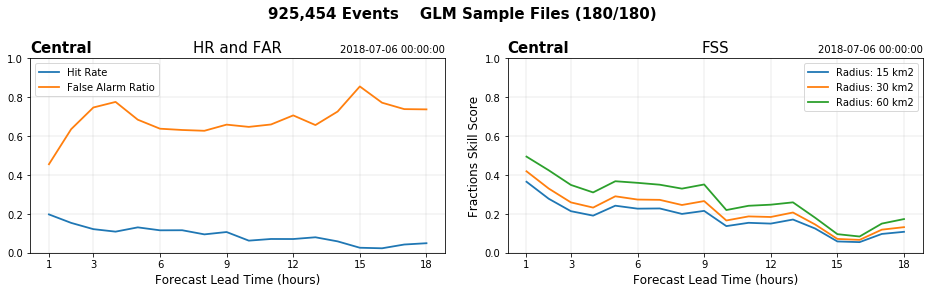

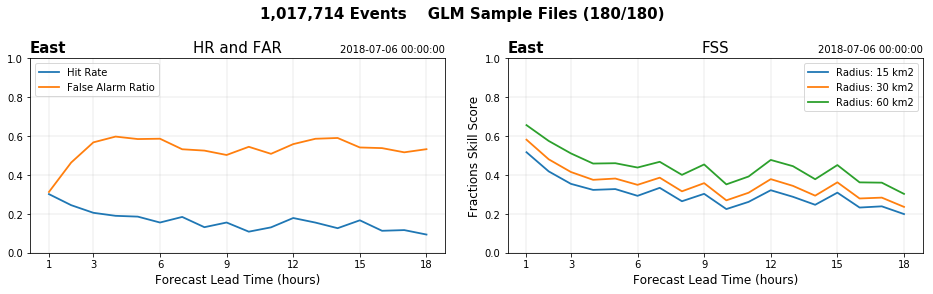

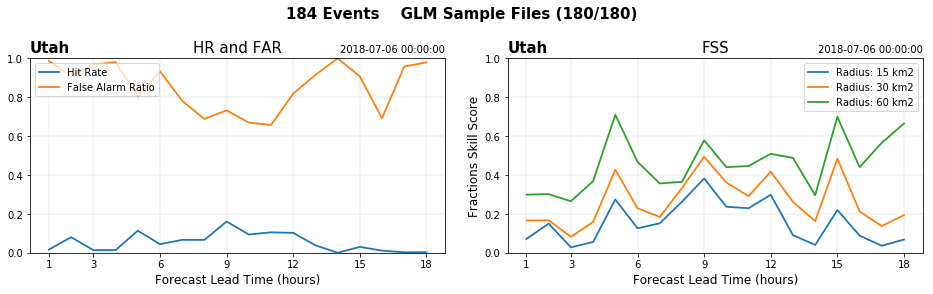

In [97]:
radii = [5, 10, 20] # For FSS scores files available


for DOMAIN in domains:
    line = get_GLM_HRRR_stats_day(DATE, DOMAIN, verbose=False)

    fix, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

    events = int(line['GLM_Event_COUNT'])
    files = line['NUM_FILES']
    expected = line['EXPECTED_FILES']
    plt.suptitle('{:,} Events    GLM Sample Files ({:}/{:})'.format(events, files, expected))
    
    plt.sca(ax1)
    A = np.array([line['F%02d_A' % (i)] for i in range(1,19)])
    B = np.array([line['F%02d_B' % (i)] for i in range(1,19)])
    C = np.array([line['F%02d_C' % (i)] for i in range(1,19)])
    D = np.array([line['F%02d_D' % (i)] for i in range(1,19)])

    hitRate = hit_rate(A, B, C, D)
    falseAlarmRatio = false_alarm_ratio(A, B, C, D)

    plt.plot(range(1,19), hitRate, label='Hit Rate')
    plt.plot(range(1,19), falseAlarmRatio, label='False Alarm Ratio')
    plt.xlabel('Forecast Lead Time (hours)')
    plt.ylabel('')
    plt.ylim([0,1])
    plt.xticks([1,3,6,9,12,15,18], [1,3,6,9,12,15,18])
    
    plt.title(DOMAIN, loc='left', fontweight='semibold')
    plt.title("HR and FAR")
    plt.title(DATE, loc='right', fontsize=10)
    
    plt.grid()
    plt.legend(loc=2)
    
    plt.sca(ax2)
    FSS = [get_GLM_HRRR_FSS_day(DATE, DOMAIN, r, verbose=False) for r in radii]

    for fss, r in zip(FSS, radii):
        values = [fss['F%02d_FSS' % h] for h in range(1,19)]
        plt.plot(range(1,19), values, label='Radius: %s km2' % (r*3))

    plt.xticks(range(1,19))

    plt.legend()
    plt.grid()

    plt.xlabel('Forecast Lead Time (hours)')
    plt.ylabel('Fractions Skill Score')
    plt.ylim([0,1])
    plt.xticks([1,3,6,9,12,15,18], [1,3,6,9,12,15,18])
    plt.title(DOMAIN, loc='left', fontweight='semibold')
    plt.title('FSS')
    plt.title(DATE, loc='right', fontsize=10)
    
    plt.subplots_adjust(top=0.8)
    
    SAVEDIR = ('./figs/stats_single_time/')
    if not os.path.exists(SAVEDIR):
            os.makedirs(SAVEDIR)
    plt.savefig(SAVEDIR+'%s_%s' % (DATE.strftime('%Y-%m-%d_%H%M'), DOMAIN))

# Percentage of Area with Forecasted LTNG and Observed GLM Events 

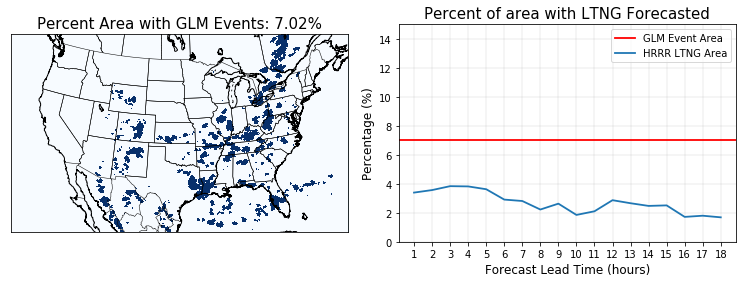

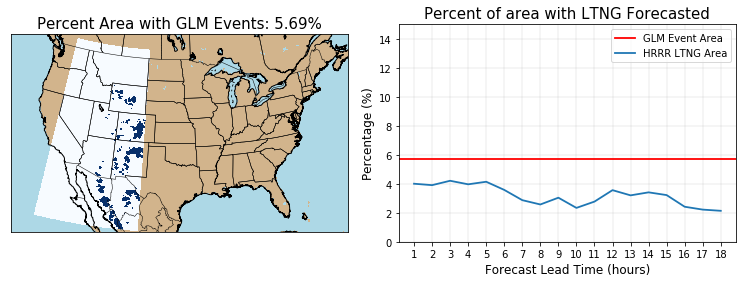

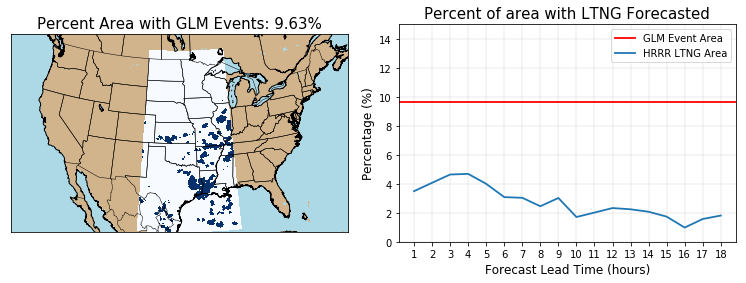

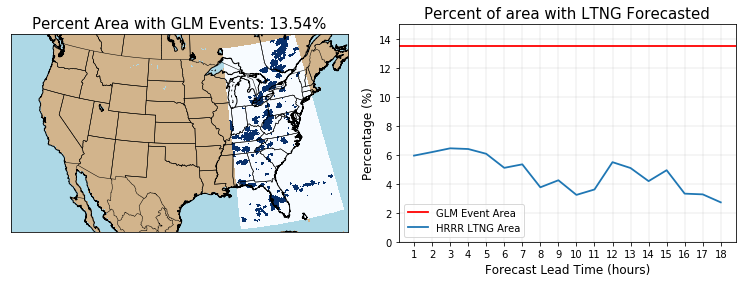

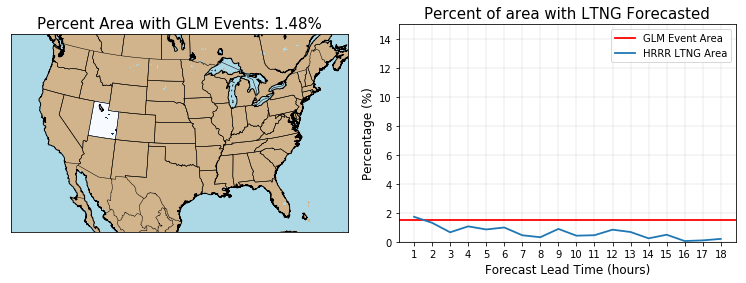

In [95]:
for DOMAIN in domains:
    total_DOMAIN_grid_points = np.sum(np.invert(domains[DOMAIN]['mask']))

    masked_array = np.ma.array(table['Observed Binary'], mask=domains[DOMAIN]['mask'])

    points_with_GLM= np.sum(masked_array)
    points_without_GLM = np.sum(np.invert(masked_array))
    
    percentage_with_GLM = points_with_GLM/total_DOMAIN_grid_points
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    plt.sca(ax1)
    plt.title('Percent Area with GLM Events: %.2f%%' % (percentage_with_GLM*100))
    m.pcolormesh(Hlon, Hlat, masked_array, latlon=True, cmap='Blues')
    m.drawlsmask(land_color='tan',ocean_color='lightblue',lakes=True)
    m.drawstates()
    m.drawcountries()
    m.drawcoastlines()
    
    plt.sca(ax2)
    LTNG_area = []
    for F in table['Forecast Binary']:
        masked_array = np.ma.array(F, mask=domains[DOMAIN]['mask'])
        points_with_LTNG= np.sum(masked_array)
        points_without_LTNG = np.sum(np.invert(masked_array))
        percentage_with_LTNG = points_with_LTNG/total_DOMAIN_grid_points
        LTNG_area.append(percentage_with_LTNG)
    
    plt.axhline(percentage_with_GLM*100, c='r', label='GLM Event Area')
    plt.plot(range(1,19), np.array(LTNG_area)*100, label='HRRR LTNG Area')
    plt.grid()
    plt.ylim([0,15])
    plt.xticks(range(1,19))
    plt.ylabel('Percentage (%)')
    plt.xlabel('Forecast Lead Time (hours)')
    plt.title('Percent of area with LTNG Forecasted')
    plt.legend()